# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Q1. Load the Data file into Python DataFrame and view top 10 rows

Attribute Information: (class attribute has been moved to last column)

   No. Attribute                     Domain
   -- -----------------------------------------
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        (2 for benign, 4 for malignant)

In [2]:
#Read the CSV file and prepare the DF
data = pd.read_csv("breast-cancer-wisconsin-data.csv") 
print(data.shape)

(699, 11)


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB
None


Bare Nuclei is object. Analysis has to be done

In [4]:
data['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

In [5]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [6]:
data.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [7]:
data.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [8]:
# We could see "?" values in column, this should be removed from data set
# Check for missing value in any other column

In [9]:
print("\nNumber of unique values of other attributes")
for cls in data.items():
    print(cls[0], "-", cls[1].nunique(), "values")
    if(cls[1].nunique() <= 10):
        print("    ", cls[1].unique())


Number of unique values of other attributes
ID - 645 values
ClumpThickness - 10 values
     [ 5  3  6  4  8  1  2  7 10  9]
Cell Size - 10 values
     [ 1  4  8 10  2  3  7  5  6  9]
Cell Shape - 10 values
     [ 1  4  8 10  2  3  5  6  7  9]
Marginal Adhesion - 10 values
     [ 1  5  3  8 10  4  6  2  9  7]
Single Epithelial Cell Size - 10 values
     [ 2  7  3  1  6  4  5  8 10  9]
Bare Nuclei - 11 values
Normal Nucleoli - 10 values
     [ 3  9  1  2  4  5  7  8  6 10]
Bland Chromatin - 10 values
     [ 1  2  7  4  5  3 10  6  9  8]
Mitoses - 9 values
     [ 1  5  4  2  3  7 10  8  6]
Class - 2 values
     [2 4]


In [10]:
# No missing values found. So let us try to remove ? from bare nuclei column
# Get count of rows having '?'

In [11]:
print('Number of rows in Bare Nuclei having ? - ', (data['Bare Nuclei']=='?').sum())

Number of rows in Bare Nuclei having ? -  16


In [12]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

In [13]:
#Use 1 which is most repeated to replace the ? 
mode_val = (data['Bare Nuclei']).mode()[0]
print(mode_val)
data['Bare Nuclei'].replace('?', mode_val, inplace=True)
data['Bare Nuclei'].unique()

1


array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [14]:
#update the object datatype to numeric for processing
data['Bare Nuclei'] = data['Bare Nuclei'].apply(pd.to_numeric)
data.dtypes

ID                             int64
ClumpThickness                 int64
Cell Size                      int64
Cell Shape                     int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Normal Nucleoli                int64
Bland Chromatin                int64
Mitoses                        int64
Class                          int64
dtype: object

In [15]:
#check for duplicated rows to perform operation
data[data.duplicated()]

ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
208  1218860               1          1           1                  1   
253  1100524               6         10          10                  2   
254  1116116               9         10          10                  1   
258  1198641               3          1           1                  1   
272   320675               3          3           5                  2   
322   733639               3          1           1                  1   
338   704097               1          1           1                  1   
561  1321942               5          1           1                  1   
684   466906               1          1           1                  1   

     Single Epithelial Cell Size  Bare Nuclei  Normal Nucleoli  \
208                            1            1                3   
253                            8           10                7   
254                           10            8                3   
258                            2            1                3   
272                            3           10                7   
322                            2            1                3   
338                            1            1                2   
561                            2            1                3   
684                            2            1                1   

     Bland Chromatin  Mitoses  Class  
208                1        1      2  
253                3        3      4  
254                3        1      4  
258                1        1      2  
272                1        1      4  
322                1        1      2  
338                1        1      2  
561                1        1      2  
684                1        1      2

In [16]:
data.drop_duplicates(inplace=True)

In [17]:
data.shape

(690, 11)

In [18]:
#check the 5 point summary
data.drop(['ID', 'Class'], axis=1).describe().transpose()

count      mean       std  min  25%  50%  75%  \
ClumpThickness               690.0  4.428986  2.817378  1.0  2.0  4.0  6.0   
Cell Size                    690.0  3.133333  3.042451  1.0  1.0  1.0  5.0   
Cell Shape                   690.0  3.204348  2.960844  1.0  1.0  1.0  5.0   
Marginal Adhesion            690.0  2.827536  2.867787  1.0  1.0  1.0  4.0   
Single Epithelial Cell Size  690.0  3.213043  2.200964  1.0  2.0  2.0  4.0   
Bare Nuclei                  690.0  3.482609  3.617064  1.0  1.0  1.0  5.0   
Normal Nucleoli              690.0  3.436232  2.444060  1.0  2.0  3.0  5.0   
Bland Chromatin              690.0  2.885507  3.067682  1.0  1.0  1.0  4.0   
Mitoses                      690.0  1.594203  1.724230  1.0  1.0  1.0  1.0   

                              max  
ClumpThickness               10.0  
Cell Size                    10.0  
Cell Shape                   10.0  
Marginal Adhesion            10.0  
Single Epithelial Cell Size  10.0  
Bare Nuclei                  10.0  
Normal Nucleoli              10.0  
Bland Chromatin              10.0  
Mitoses                      10.0

In [19]:
#ID is not a useful column - we can drop it
data.drop('ID', axis=1, inplace=True)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


In [20]:
# Check for correlation of variable

In [21]:
#Check for high correlating items
corr = data.corr()
corr

ClumpThickness  Cell Size  Cell Shape  \
ClumpThickness                     1.000000   0.643173    0.653589   
Cell Size                          0.643173   1.000000    0.905349   
Cell Shape                         0.653589   0.905349    1.000000   
Marginal Adhesion                  0.487715   0.712933    0.690782   
Single Epithelial Cell Size        0.517253   0.746982    0.714243   
Bare Nuclei                        0.590648   0.684571    0.704165   
Normal Nucleoli                    0.561063   0.759632    0.738576   
Bland Chromatin                    0.535507   0.727073    0.724519   
Mitoses                            0.350196   0.459918    0.440435   
Class                              0.716812   0.817586    0.817551   

                             Marginal Adhesion  Single Epithelial Cell Size  \
ClumpThickness                        0.487715                     0.517253   
Cell Size                             0.712933                     0.746982   
Cell Shape                            0.690782                     0.714243   
Marginal Adhesion                     1.000000                     0.608281   
Single Epithelial Cell Size           0.608281                     1.000000   
Bare Nuclei                           0.672512                     0.580487   
Normal Nucleoli                       0.669860                     0.620526   
Bland Chromatin                       0.602228                     0.633880   
Mitoses                               0.417008                     0.482517   
Class                                 0.701175                     0.681063   

                             Bare Nuclei  Normal Nucleoli  Bland Chromatin  \
ClumpThickness                  0.590648         0.561063         0.535507   
Cell Size                       0.684571         0.759632         0.727073   
Cell Shape                      0.704165         0.738576         0.724519   
Marginal Adhesion               0.672512         0.669860         0.602228   
Single Epithelial Cell Size     0.580487         0.620526         0.633880   
Bare Nuclei                     1.000000         0.672754         0.578161   
Normal Nucleoli                 0.672754         1.000000         0.669099   
Bland Chromatin                 0.578161         0.669099         1.000000   
Mitoses                         0.342823         0.343769         0.427490   
Class                           0.816655         0.756736         0.715363   

                              Mitoses     Class  
ClumpThickness               0.350196  0.716812  
Cell Size                    0.459918  0.817586  
Cell Shape                   0.440435  0.817551  
Marginal Adhesion            0.417008  0.701175  
Single Epithelial Cell Size  0.482517  0.681063  
Bare Nuclei                  0.342823  0.816655  
Normal Nucleoli              0.343769  0.756736  
Bland Chromatin              0.427490  0.715363  
Mitoses                      1.000000  0.423947  
Class                        0.423947  1.000000

1. There is high correlation between target class and Cell Size, Cell Shape, Bare Nuclei and Normal Nucleoli
2. There is high correlation between Cell Size and Cell Shape. Analysis to be made if a column can be dropped

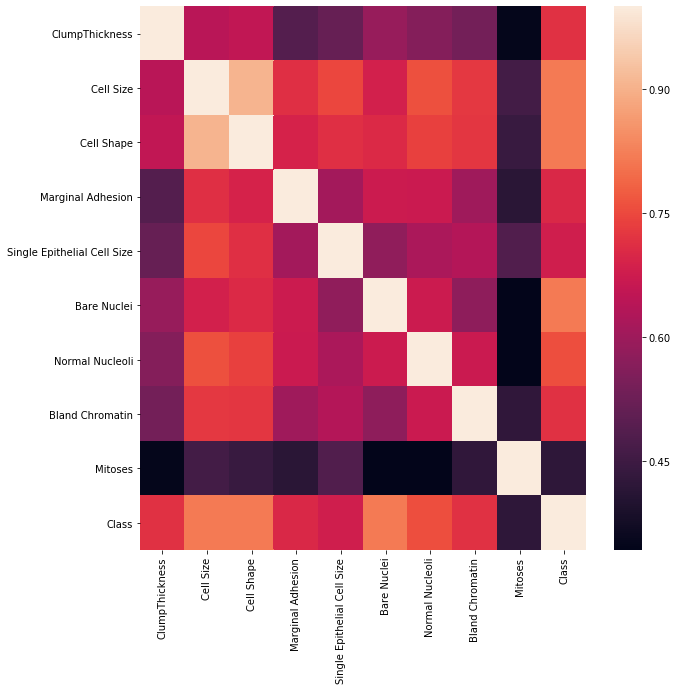

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(corr)
plt.show()

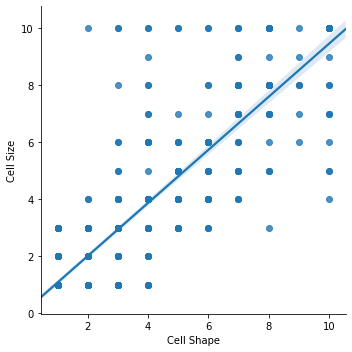

In [23]:
#Seeing if there is high correlation. If one column can be dropped.
sns.lmplot('Cell Shape', 'Cell Size', data)
plt.show()

Not able to clearly decide from the plot

Summary
Cell size shows high significance with cell shape
Target variable shows high correlation with most of these variables [marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli and bland chromatin]

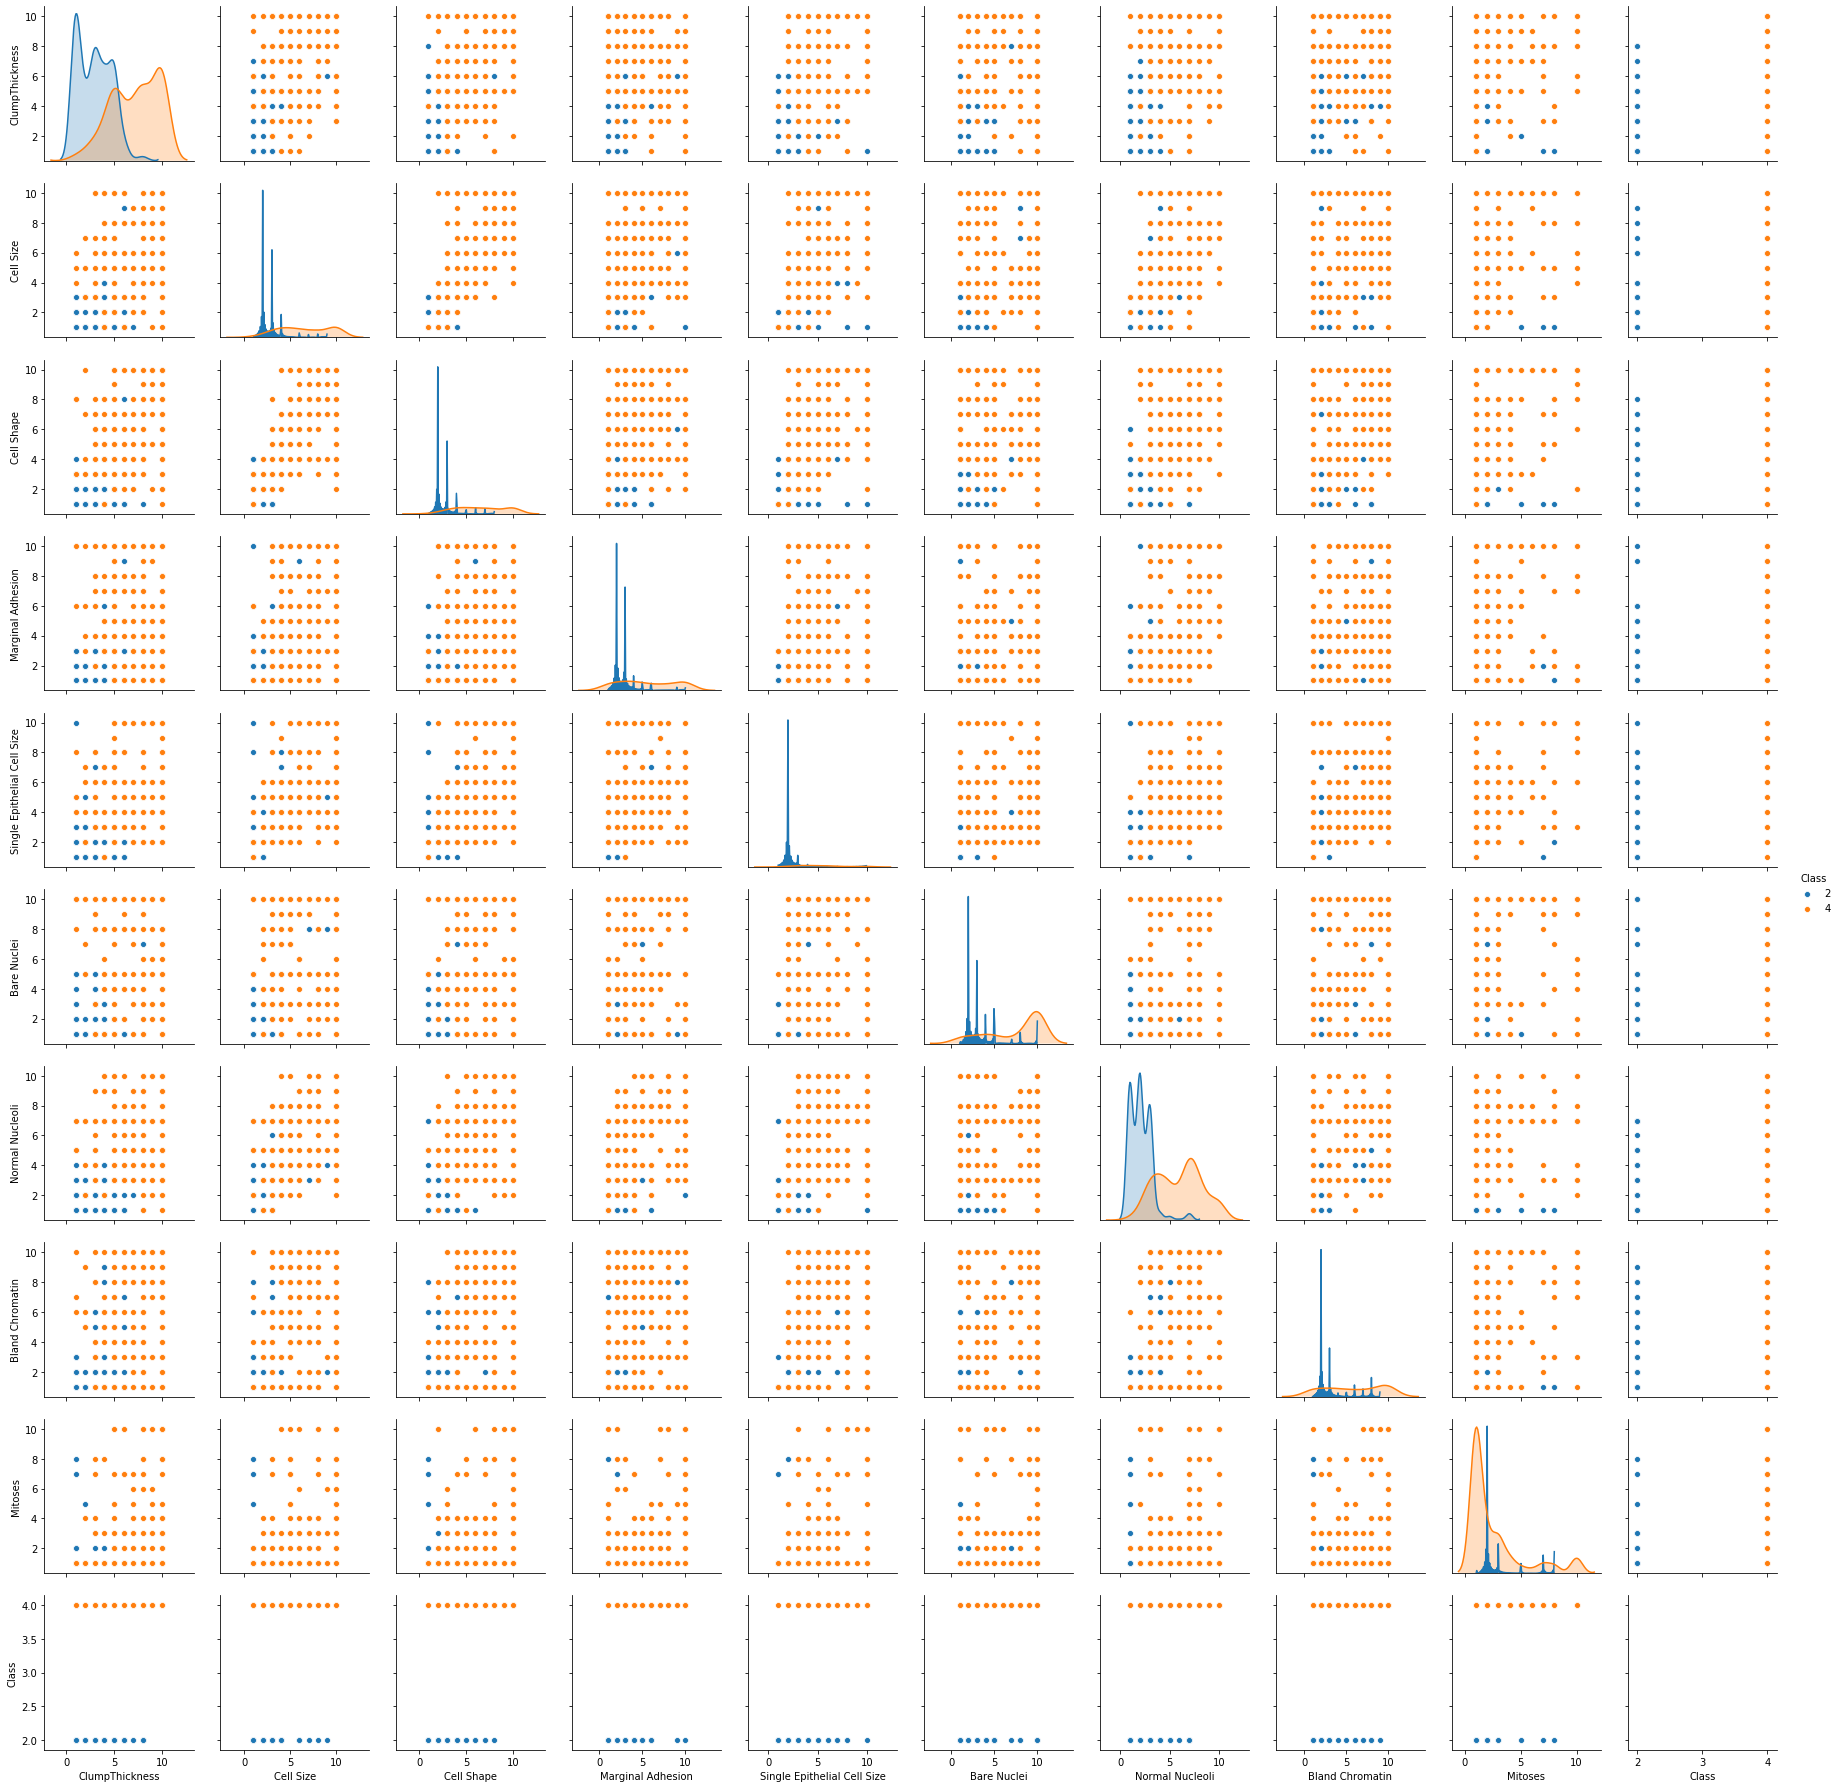

In [24]:
#Let us check for pair plots
sns.pairplot(data, diag_kind='kde', hue='Class')
plt.show()

In [25]:
def printHistAndBoxPlot(df, cols, hue):
    for col in cols:
        if(col != hue):   
            f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))
            histData = [df[col][df[hue]==cls_name] for cls_name in [2, 4]]
            ax1.hist(histData, histtype='bar', normed=True, stacked=True)
            sns.boxplot(x=hue, y=col, data=df, ax=ax2)
            plt.show() 

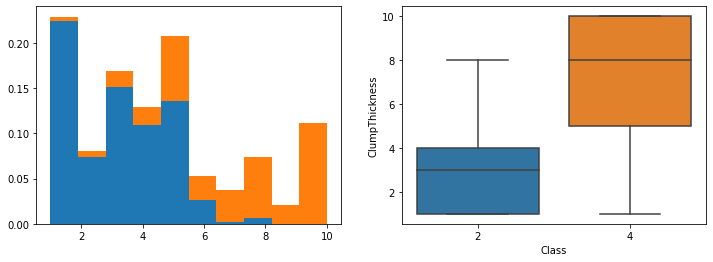

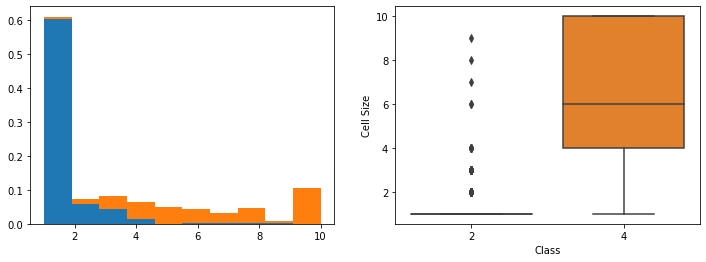

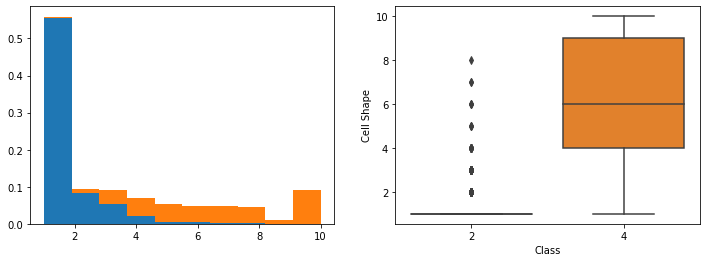

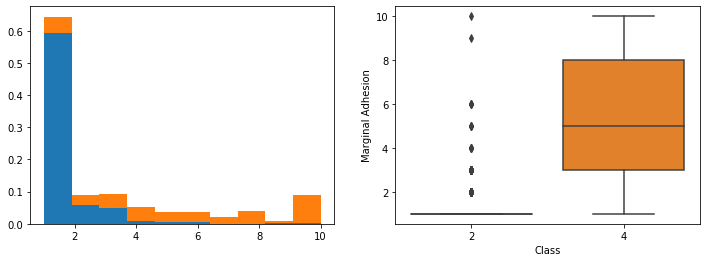

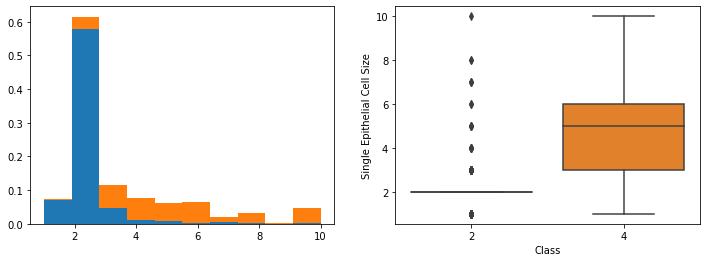

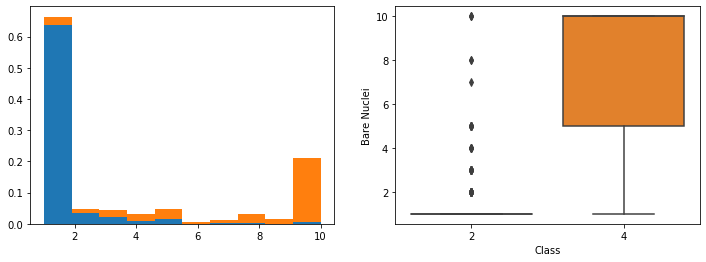

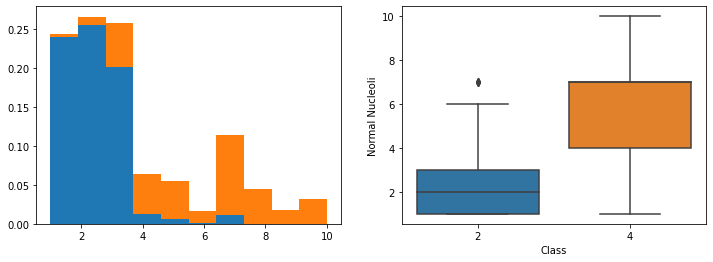

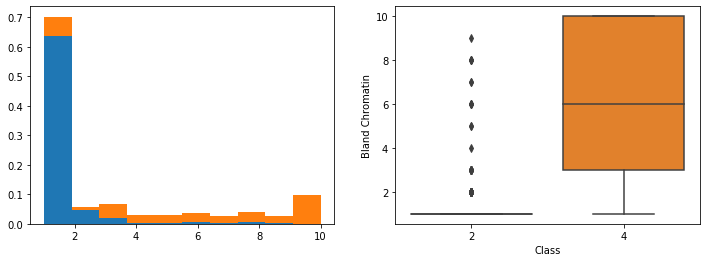

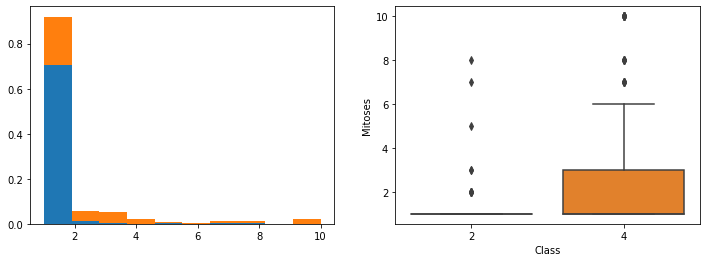

In [26]:
printHistAndBoxPlot(data, data.columns, 'Class')

1. Mitosses has low correlation with target variable. However based on the median between different target class it can offer seperability. It is also having low correlation with all features - so it can be considered as a feature to be used by model
2. All classes offer support and seperability of the 2 target classes
3. Cell Shape and Cell Size are showing similar histogram, box plot and high correlation. One can be dropped. Cell Size can be dropped

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [27]:
#data.drop('Cell Size', axis=1, inplace=True)
#data.head(1)

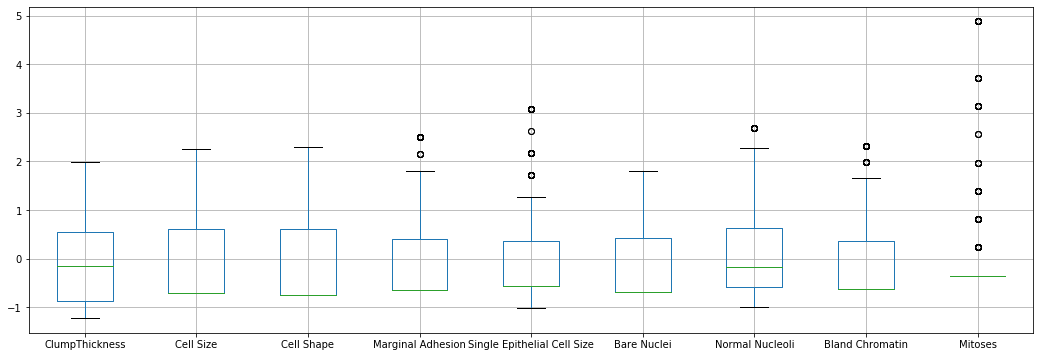

In [28]:
from scipy.stats import zscore
data_z = data.drop('Class', axis=1).apply(zscore)
plt.figure(figsize=(18,6))
data_z.boxplot()
plt.show()

In [29]:
print("Number of rows that will be lost if outliers are dropped - ", data.count()[0] - data[(np.abs(zscore(data)) < 3).all(axis=1)].count()[0])

Number of rows that will be lost if outliers are dropped -  50


Close 10% rows is too high. So treat outliers with 3sigma value

In [30]:
#function checks for > 3 sigma in the positive side and replaces with 3 sigma
def replace(dfCol):
    mean, std = dfCol.mean(), dfCol.std()
    outliers = (dfCol - mean).abs() > 3*std
    dfCol[outliers] = 3*std
    return dfCol

In [31]:
#just put the values to 3 sigma
for col in data_z.columns:
    data_z[col] = data_z[col].transform(replace)

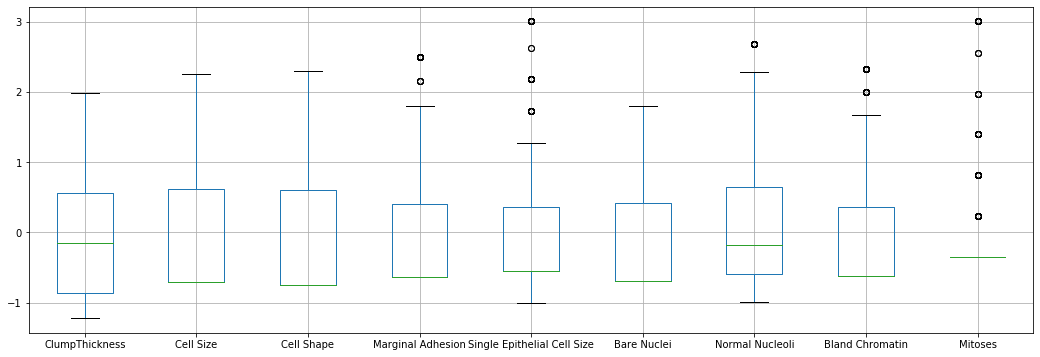

In [32]:
plt.figure(figsize=(18,6))
data_z.boxplot()
plt.show()

It is clear now that with the updated box plot the value greater than 3 sigma has moved to 3 sigma

# Q6 Create a covariance matrix for identifying Principal components

In [33]:
# PCA
# Step 1 - Create covariance matrix

In [34]:
cov_matrix = np.cov(data_z.T)
print('Covariance Matrix \n', cov_matrix)

Covariance Matrix 
 [[1.00145138 0.64410677 0.65453792 0.48842317 0.51394254 0.59150555
  0.56187702 0.53628373 0.29063505]
 [0.64410677 1.00145138 0.9066632  0.71396807 0.742073   0.68556472
  0.76073447 0.7281282  0.38010392]
 [0.65453792 0.9066632  1.00145138 0.6917849  0.70982477 0.70518656
  0.73964761 0.72557104 0.36500812]
 [0.48842317 0.71396807 0.6917849  1.00145138 0.60483335 0.67348849
  0.67083263 0.60310209 0.35098205]
 [0.51394254 0.742073   0.70982477 0.60483335 0.97925345 0.57761529
  0.61690508 0.63109808 0.38297483]
 [0.59150555 0.68556472 0.70518656 0.67348849 0.57761529 1.00145138
  0.67373075 0.57900023 0.30284964]
 [0.56187702 0.76073447 0.73964761 0.67083263 0.61690508 0.67373075
  1.00145138 0.67006996 0.29334351]
 [0.53628373 0.7281282  0.72557104 0.60310209 0.63109808 0.57900023
  0.67006996 1.00145138 0.35324167]
 [0.29063505 0.38010392 0.36500812 0.35098205 0.38297483 0.30284964
  0.29334351 0.35324167 0.63195595]]


In [35]:
cov_matrix.shape

(9, 9)

# Q7 Identify eigen values and eigen vector

In [36]:
# Step 2- Get eigen values and eigen vector

In [37]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

In [38]:
print('Eigen Values \n%s', eigenvalues)
print('\n Eigen Vectors \n%s', eigenvectors)

Eigen Values 
%s [5.80423625 0.09042899 0.55987565 0.51462786 0.4446387  0.35815591
 0.26175896 0.30189176 0.28575499]

 Eigen Vectors 
%s [[-0.30555556 -0.00265461  0.73138076 -0.47693817  0.12739088 -0.04654604
   0.2637053  -0.20958827 -0.11125744]
 [-0.38486731 -0.73687952 -0.04506327 -0.04754461 -0.17334237  0.18207058
  -0.43894305 -0.21104947  0.06468682]
 [-0.38144961  0.66378968  0.02903203 -0.04540555 -0.17105953  0.14132415
  -0.58705879 -0.12986288  0.01544864]
 [-0.33792642  0.04509967 -0.20152336  0.45433393  0.38489545 -0.08171455
   0.19938751 -0.52639003 -0.40629688]
 [-0.33460965  0.06792602 -0.34621219 -0.24157158 -0.0755034   0.67502295
   0.4279002   0.22478375 -0.10109239]
 [-0.33803441 -0.07166153  0.28089095  0.37763443  0.39299408  0.01519024
  -0.14232946  0.69441379 -0.04412032]
 [-0.35163328  0.06296778  0.05599541  0.3279073  -0.2512163  -0.14537089
   0.35685036 -0.10046045  0.73488339]
 [-0.33976794 -0.02116349 -0.20943062 -0.13396859 -0.47420608 -0.59945

# Q8 Find variance and cumulative variance by each eigen vector

In [39]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
print("Variance\n", var_exp)
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance\n", cum_var_exp)

Variance
 [67.32383465861676, 6.494045704223904, 5.969212689979035, 5.157402460857131, 4.154281188945451, 3.5016683911556807, 3.314496666457588, 3.036164668584979, 1.0488935711794802]
Cumulative Variance
 [ 67.32383466  73.81788036  79.78709305  84.94449551  89.0987767
  92.60044509  95.91494176  98.95110643 100.        ]


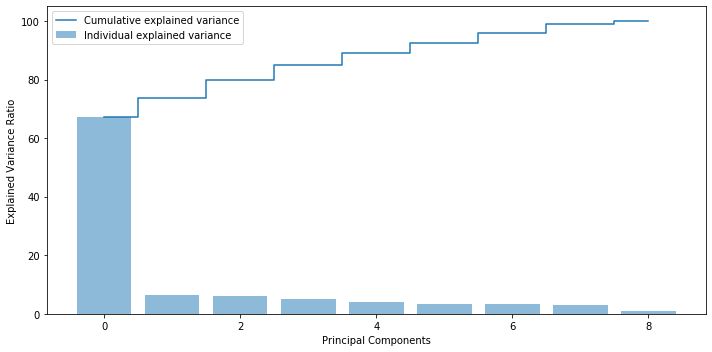

In [40]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(len(var_exp)), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=7, random_state=5)

In [43]:
pca.fit(data_z)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=5,
    svd_solver='auto', tol=0.0, whiten=False)

In [44]:
X_reduced = pca.transform(data_z)

In [45]:
X_reduced.shape

(690, 7)

In [46]:
from sklearn.cluster import KMeans
kmeans_pca = KMeans(n_clusters=2, n_init = 100, random_state=5)
kmeans_pca.fit(X_reduced)
kmeans_pca.inertia_

2285.9340216524697

In [47]:
centroids=kmeans_pca.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = ['pc1','pc2','pc3', 'pc4', 'pc5', 'pc6', 'pc7'] )
centroid_df

pc1       pc2       pc3       pc4       pc5       pc6       pc7
0 -1.575866  0.043162  0.036724 -0.002040 -0.011008  0.034917  0.019327
1  3.131265 -0.085764 -0.072972  0.004053  0.021873 -0.069381 -0.038403

In [48]:
labels = pd.DataFrame(kmeans_pca.labels_)
labels[0].value_counts()

0    459
1    231
Name: 0, dtype: int64

In [49]:
data['Class'].value_counts()

2    452
4    238
Name: Class, dtype: int64

In [50]:
#check the confusion matrix
from sklearn.metrics import confusion_matrix
data['Pred'] = (kmeans_pca.predict(X_reduced)+1)*2 #just make it 2 & 4 for easy comparison
confusion_matrix = confusion_matrix(data['Class'], data['Pred'])
confusion_matrix

array([[440,  12],
       [ 19, 219]], dtype=int64)

# Q10 Find correlation between components and features

In [51]:
pd.DataFrame(pca.components_, columns=data_z.columns)

ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0        0.305556   0.384867    0.381450           0.337926   
1       -0.731381   0.045063   -0.029032           0.201523   
2        0.476938   0.047545    0.045406          -0.454334   
3       -0.127391   0.173342    0.171060          -0.384895   
4       -0.046546   0.182071    0.141324          -0.081715   
5        0.209588   0.211049    0.129863           0.526390   
6       -0.111257   0.064687    0.015449          -0.406297   

   Single Epithelial Cell Size  Bare Nuclei  Normal Nucleoli  Bland Chromatin  \
0                     0.334610     0.338034         0.351633         0.339768   
1                     0.346212    -0.280891        -0.055995         0.209431   
2                     0.241572    -0.377634        -0.327907         0.133969   
3                     0.075503    -0.392994         0.251216         0.474206   
4                     0.675023     0.015190        -0.145371        -0.599451   
5                    -0.224784    -0.694414         0.100460        -0.271568   
6                    -0.101092    -0.044120         0.734883        -0.387079   

    Mitoses  
0  0.183019  
1  0.419330  
2  0.485132  
3 -0.572880  
4 -0.318862  
5 -0.031629  
6  0.340693

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [52]:
data = pd.read_csv('jokes.csv')

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [53]:
data.shape

(24983, 101)

In [54]:
ratings = data.iloc[0:200, 1:]
ratings.shape

(200, 100)

# Q22 Change the column indices from 0 to 99

In [55]:
ratings.columns = np.arange(0, 100)
ratings.head()

0      1      2      3     4     5     6     7      8      9   ...  \
0  -7.82   8.79  -9.66  -8.16 -7.52 -8.50 -9.85  4.17  -8.98  -4.76  ...   
1   4.08  -0.29   6.36   4.37 -2.38 -9.66 -0.73 -5.34   8.88   9.22  ...   
2  99.00  99.00  99.00  99.00  9.03  9.27  9.03  9.27  99.00  99.00  ...   
3  99.00   8.35  99.00  99.00  1.80  8.16 -2.82  6.21  99.00   1.84  ...   
4   8.50   4.61  -4.17  -5.39  1.36  1.60  7.04  4.61  -0.44   5.73  ...   

      90     91     92     93     94     95     96     97     98     99  
0   2.82  99.00  99.00  99.00  99.00  99.00  -5.63  99.00  99.00  99.00  
1   2.82  -4.95  -0.29   7.86  -0.19  -2.14   3.06   0.34  -4.32   1.07  
2  99.00  99.00  99.00   9.08  99.00  99.00  99.00  99.00  99.00  99.00  
3  99.00  99.00  99.00   0.53  99.00  99.00  99.00  99.00  99.00  99.00  
4   5.19   5.58   4.27   5.19   5.73   1.55   3.11   6.55   1.80   1.60  

[5 rows x 100 columns]

# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [56]:
print("Before - ", (ratings == 99.0).sum().sum())
ratings.replace(99, 0, inplace=True)
print("After - ", (ratings == 99.0).sum().sum())

Before -  5978
After -  0


# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
ratings_diff = sc.fit_transform(ratings)
ratings_diff

array([[-1.85701632,  1.67164929, -2.21918089, ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 0.78949409, -0.1802773 ,  1.3727099 , ...,  0.07059963,
        -1.36765027,  0.16746078],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       ...,
       [ 0.46479617, -0.89412566, -0.3156133 , ..., -0.23610604,
         0.18266036, -0.02590486],
       [-0.11788091, -0.12112987, -0.0532842 , ..., -0.02685824,
        -0.04144395, -0.16095388],
       [ 1.12308784, -1.60593445, -1.07569506, ..., -0.02685824,
        -0.04144395, -0.16095388]])

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [58]:
ratings_z = pd.DataFrame(ratings_diff)

In [59]:
ratings_mean = pd.DataFrame(ratings_z.mean(), columns=['Mean'])
print("Top 10 Joke IDs: ", np.array(ratings_mean.sort_values(by='Mean', ascending=False).head(10).index))

Top 10 Joke IDs:  [98 81 97 20 94 92 47 73 99 49]
